<h1>Financial Analysis And Time Series Forecasting Using Tensorflow <h1/>

This notebook performs basic financial analysis on stock data of <br/> Master Card <br/> PayPal <br/> Visa <br/> This notebook also attempts and uses deep learning by applying the LSTM (Long Short Term Memory) to forecast future closing price of the stock data using Googles <strong>TensorFlow</strong>

All Data dates from August 2015 to August 2022 and where gotten from YAHOO FINANCE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Loading in the data
ma = pd.read_csv("MA.csv")
pypl =pd.read_csv('PYPL.csv') 
visa =pd.read_csv('V.csv')

In [3]:
# Converting data to index
ma['Date'] = pd.to_datetime(ma['Date'])
ma.set_index('Date',inplace=True)

pypl['Date'] = pd.to_datetime(pypl['Date'])
pypl.set_index('Date',inplace=True)


visa['Date'] = pd.to_datetime(visa['Date'])
visa.set_index('Date',inplace=True)

In [4]:
ma.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-04,97.449997,98.300003,97.139999,97.300003,93.239677,2976200
2015-08-05,98.080002,98.730003,97.790001,98.269997,94.169212,3306100
2015-08-06,98.559998,98.610001,96.919998,97.160004,93.105553,4109900
2015-08-07,97.089996,97.790001,96.559998,97.769997,93.690079,3114900
2015-08-10,98.370003,99.180000,97.800003,98.080002,93.987129,3445500


In [5]:
pypl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-04,39.910000,39.910000,38.430000,38.950001,38.950001,10992200
2015-08-05,39.700001,39.880001,39.169998,39.270000,39.270000,9463100
2015-08-06,39.630001,39.740002,38.549999,38.849998,38.849998,7324100
2015-08-07,39.040001,39.230000,38.599998,39.130001,39.130001,8331300
2015-08-10,39.430000,39.689999,38.770000,39.049999,39.049999,7998900


In [6]:
visa.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-04,75.529999,76.080002,75.029999,75.269997,71.821739,6957900
2015-08-05,76.050003,76.169998,74.919998,74.980003,71.545044,6976400
2015-08-06,75.300003,75.419998,73.550003,73.580002,70.209167,7767800
2015-08-07,73.680000,74.309998,73.320000,74.209999,70.810318,6484600
2015-08-10,74.889999,75.180000,73.849998,74.379997,70.972534,6183500


## EDA 

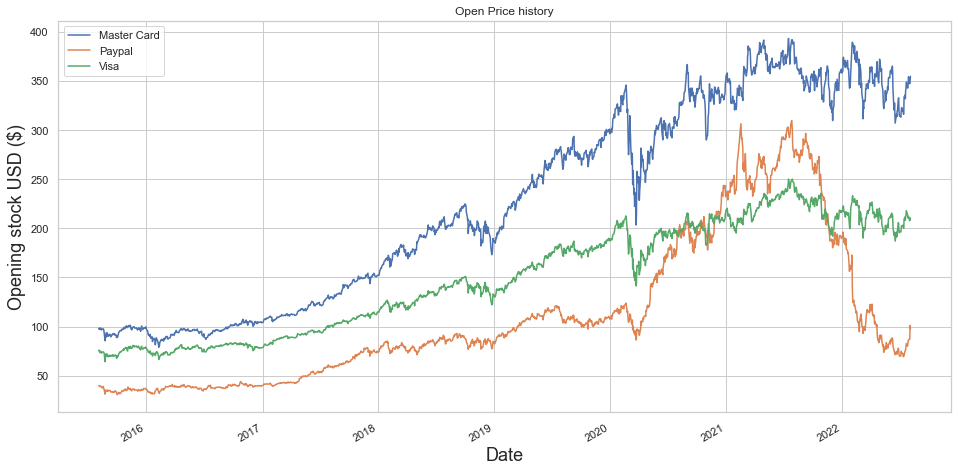

In [7]:
sns.set_style('whitegrid')
ma['Open'].plot(label='Master Card',figsize=(16,8),title='Open Price history')
pypl['Open'].plot(label='Paypal')
visa['Open'].plot(label='Visa')
plt.xlabel("Date", fontsize=18)
plt.ylabel('Opening stock USD ($)', fontsize=18)
plt.legend()

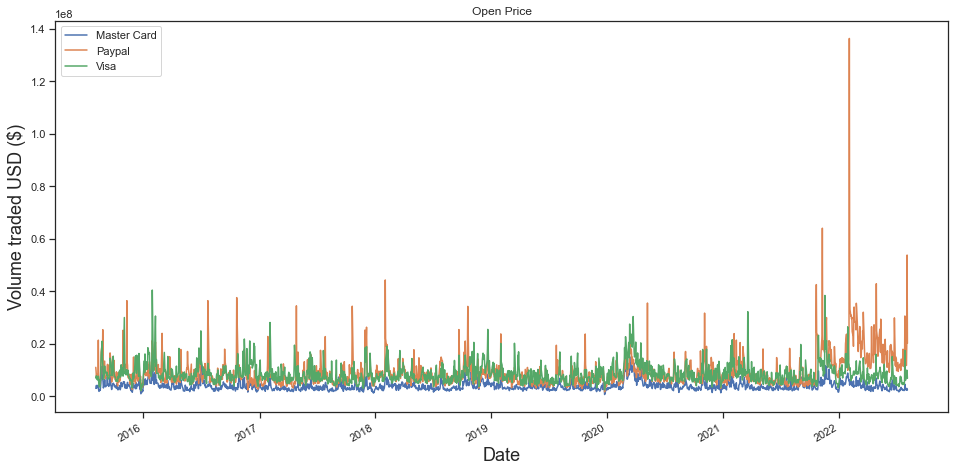

In [8]:
sns.set_style('ticks')
plt.figure(figsize=(16,8))
ma['Volume'].plot(label='Master Card',figsize=(16,8),title='Open Price')
pypl['Volume'].plot(label='Paypal')
visa['Volume'].plot(label='Visa')
plt.xlabel("Date", fontsize=18)
plt.ylabel('Volume traded USD ($)', fontsize=18)
plt.legend()

In [9]:
pypl['Volume'].idxmax()

Timestamp('2022-02-02 00:00:00')

**Paypal had a big spike in taded volume on 2nd-February-2022** 




**But the Open Price Time Series Visualization makes Master Card look like its always been much more valuable as a company than Paypal and Visa. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

**Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [10]:
ma['Total Traded'] = ma['Open']*ma['Volume']
pypl['Total Traded'] = pypl['Open']*pypl['Volume']
visa['Total Traded'] = visa['Open']*visa['Volume']

Text(0, 0.5, 'Total Traded')

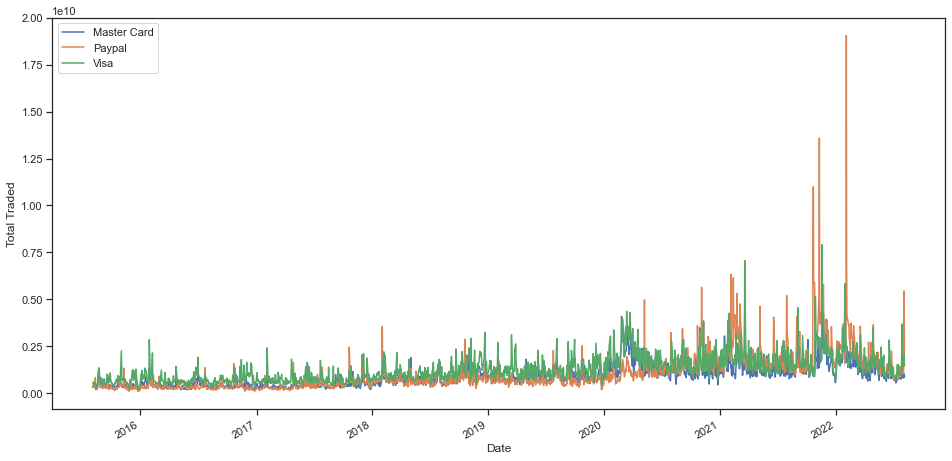

In [11]:
ma['Total Traded'].plot(label='Master Card',figsize=(16,8))
pypl['Total Traded'].plot(label='Paypal')
visa['Total Traded'].plot(label='Visa')
plt.legend()
plt.ylabel('Total Traded')

In [12]:
pypl['Total Traded'].idxmax()

Timestamp('2022-02-02 00:00:00')

PayPal also had a lot of money traded Febuary 2022

**Checking if there are relationships in stocks**

<Figure size 1440x720 with 0 Axes>

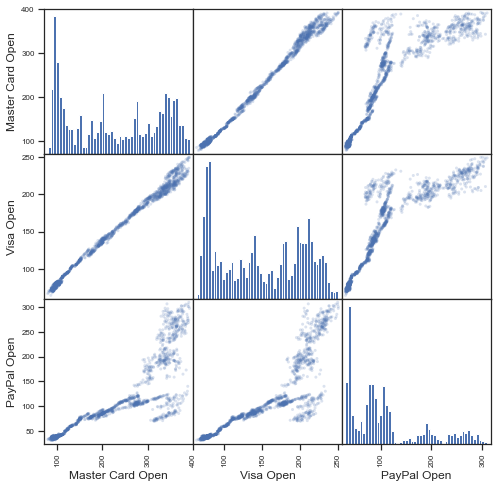

In [13]:
from pandas.plotting import scatter_matrix

Payment = pd.concat([ma['Open'],visa['Open'],pypl['Open']],axis=1)

Payment.columns = ['Master Card Open','Visa Open','PayPal Open']

# You can use a semi-colon to remove the axes print outs
plt.figure(figsize=(20,10))
scatter_matrix(Payment,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

 ## Basic Financial Analysis

### Daily Percentage Change

Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

In [14]:
ma['returns'] = ma['Close'].pct_change(1)
pypl['returns'] = pypl['Close'].pct_change(1)
visa['returns'] = visa['Close'].pct_change(1)

In [15]:
ma.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns
Date,,,,,,,,
2015-08-04,97.449997,98.300003,97.139999,97.300003,93.239677,2976200,2.900307e+08,NaN
2015-08-05,98.080002,98.730003,97.790001,98.269997,94.169212,3306100,3.242623e+08,0.009969
2015-08-06,98.559998,98.610001,96.919998,97.160004,93.105553,4109900,4.050717e+08,-0.011295
2015-08-07,97.089996,97.790001,96.559998,97.769997,93.690079,3114900,3.024256e+08,0.006278
2015-08-10,98.370003,99.180000,97.800003,98.080002,93.987129,3445500,3.389338e+08,0.003171


In [16]:
pypl.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns
Date,,,,,,,,
2015-08-04,39.910000,39.910000,38.430000,38.950001,38.950001,10992200,4.386987e+08,NaN
2015-08-05,39.700001,39.880001,39.169998,39.270000,39.270000,9463100,3.756851e+08,0.008216
2015-08-06,39.630001,39.740002,38.549999,38.849998,38.849998,7324100,2.902541e+08,-0.010695
2015-08-07,39.040001,39.230000,38.599998,39.130001,39.130001,8331300,3.252540e+08,0.007207
2015-08-10,39.430000,39.689999,38.770000,39.049999,39.049999,7998900,3.153966e+08,-0.002045


In [17]:
visa.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns
Date,,,,,,,,
2015-08-04,75.529999,76.080002,75.029999,75.269997,71.821739,6957900,5.255302e+08,NaN
2015-08-05,76.050003,76.169998,74.919998,74.980003,71.545044,6976400,5.305552e+08,-0.003853
2015-08-06,75.300003,75.419998,73.550003,73.580002,70.209167,7767800,5.849154e+08,-0.018672
2015-08-07,73.680000,74.309998,73.320000,74.209999,70.810318,6484600,4.777853e+08,0.008562
2015-08-10,74.889999,75.180000,73.849998,74.379997,70.972534,6183500,4.630823e+08,0.002291


**ploting an histogram of each companies returns helps to determine which stock is more volatile, this can be judged based on the varaince of daily returns.**

<AxesSubplot:>

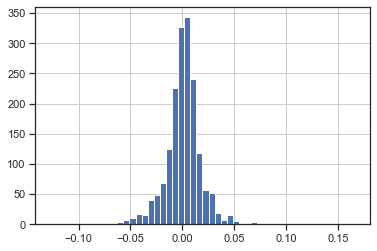

In [18]:
ma['returns'].hist(bins=50)

<AxesSubplot:>

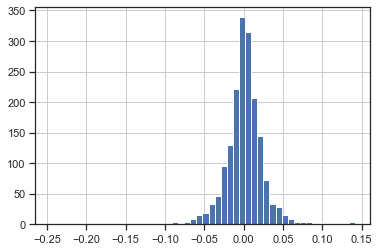

In [19]:
pypl['returns'].hist(bins=50)

<AxesSubplot:>

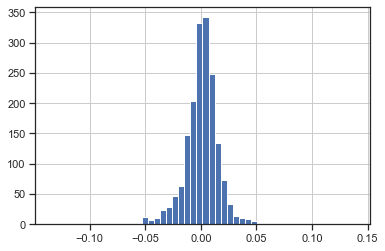

In [20]:
visa['returns'].hist(bins=50)

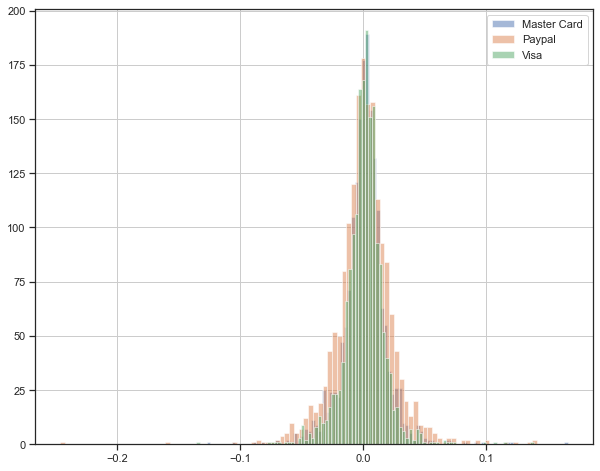

In [21]:
ma['returns'].hist(bins=100,label='Master Card',figsize=(10,8),alpha=0.5)
pypl['returns'].hist(bins=100,label='Paypal',alpha=0.5)
visa['returns'].hist(bins=100,label='Visa',alpha=0.5)
plt.legend()

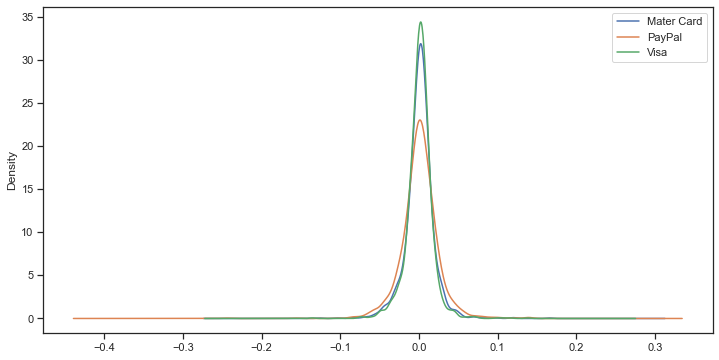

In [22]:
ma['returns'].plot(kind='kde',label='Mater Card',figsize=(12,6))
pypl['returns'].plot(kind='kde',label='PayPal')
visa['returns'].plot(kind='kde',label='Visa')
plt.legend()

## Comparing Daily Returns between Stocks

**Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the companies  stocks are.?**

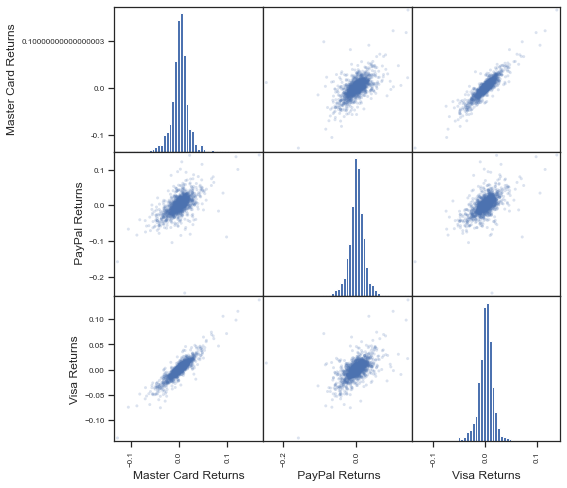

In [23]:
relation_df = pd.concat([ma['returns'],pypl['returns'],visa['returns']],axis=1)
relation_df.columns = ['Master Card Returns',' PayPal Returns','Visa Returns']
scatter_matrix(relation_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

**All Daily returns are related to each other but It looks like Master Card and Visa have a strong relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Master Card Returns', ylabel='Visa Returns'>

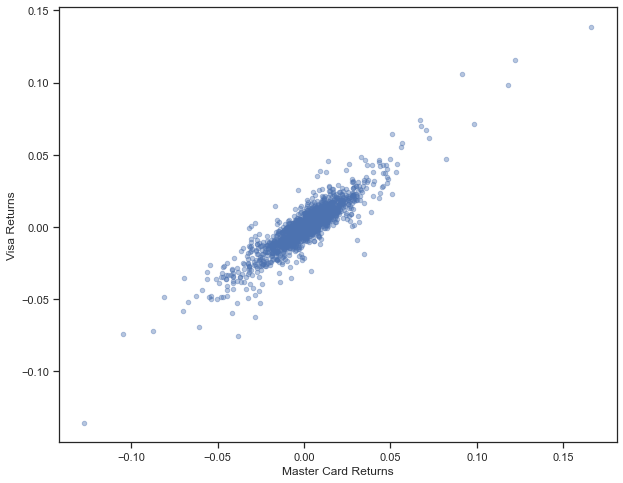

In [24]:
relation_df.plot(kind='scatter',x='Master Card Returns',y='Visa Returns',alpha=0.4,figsize=(10,8))

## Cumulative Daily Returns

In [25]:
ma['Cumulative Return'] = (1 + ma['returns']).cumprod()
pypl['Cumulative Return'] = (1 + pypl['returns']).cumprod()
visa['Cumulative Return'] = (1 + visa['returns']).cumprod()

In [26]:
ma.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2015-08-04,97.449997,98.300003,97.139999,97.300003,93.239677,2976200,2.900307e+08,NaN,NaN
2015-08-05,98.080002,98.730003,97.790001,98.269997,94.169212,3306100,3.242623e+08,0.009969,1.009969
2015-08-06,98.559998,98.610001,96.919998,97.160004,93.105553,4109900,4.050717e+08,-0.011295,0.998561
2015-08-07,97.089996,97.790001,96.559998,97.769997,93.690079,3114900,3.024256e+08,0.006278,1.004830
2015-08-10,98.370003,99.180000,97.800003,98.080002,93.987129,3445500,3.389338e+08,0.003171,1.008016


In [27]:
pypl.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2015-08-04,39.910000,39.910000,38.430000,38.950001,38.950001,10992200,4.386987e+08,NaN,NaN
2015-08-05,39.700001,39.880001,39.169998,39.270000,39.270000,9463100,3.756851e+08,0.008216,1.008216
2015-08-06,39.630001,39.740002,38.549999,38.849998,38.849998,7324100,2.902541e+08,-0.010695,0.997433
2015-08-07,39.040001,39.230000,38.599998,39.130001,39.130001,8331300,3.252540e+08,0.007207,1.004621
2015-08-10,39.430000,39.689999,38.770000,39.049999,39.049999,7998900,3.153966e+08,-0.002045,1.002567


In [28]:
visa.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2015-08-04,75.529999,76.080002,75.029999,75.269997,71.821739,6957900,5.255302e+08,NaN,NaN
2015-08-05,76.050003,76.169998,74.919998,74.980003,71.545044,6976400,5.305552e+08,-0.003853,0.996147
2015-08-06,75.300003,75.419998,73.550003,73.580002,70.209167,7767800,5.849154e+08,-0.018672,0.977548
2015-08-07,73.680000,74.309998,73.320000,74.209999,70.810318,6484600,4.777853e+08,0.008562,0.985917
2015-08-10,74.889999,75.180000,73.849998,74.379997,70.972534,6183500,4.630823e+08,0.002291,0.988176


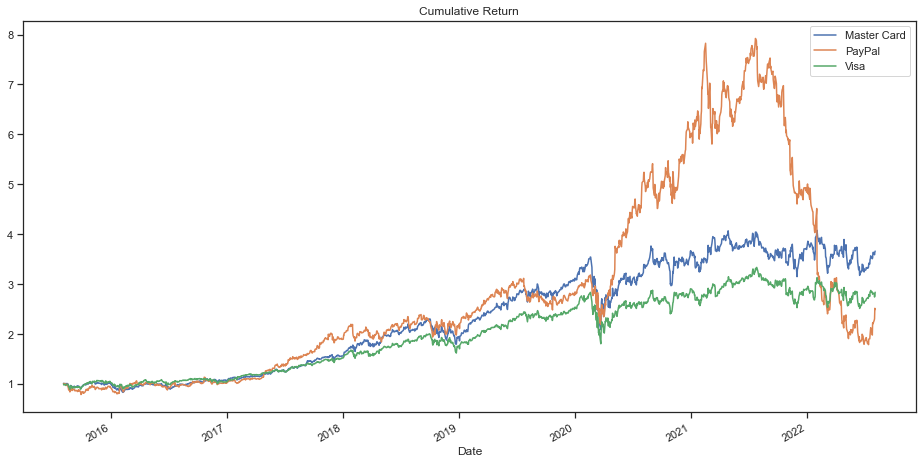

In [29]:
ma['Cumulative Return'].plot(label='Master Card',figsize=(16,8),title='Cumulative Return')
pypl['Cumulative Return'].plot(label='PayPal')
visa['Cumulative Return'].plot(label='Visa')
plt.legend()

##  APPLYING DEEP LEARNING (LSTM) WITH THE TENSORFLOW LIBRARY TO FORECAST

Using Deep Learning to predict the closing stock price of the 3 company

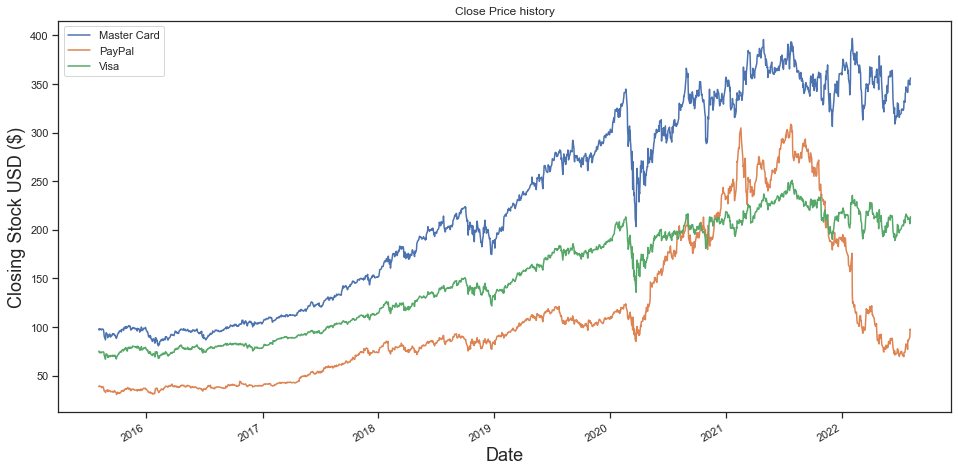

In [30]:
plt.figure(figsize=(16,8))
ma['Close'].plot(label='Master Card',figsize=(16,8),title='Close Price history')
pypl['Close'].plot(label='PayPal')
visa['Close'].plot(label='Visa')
plt.xlabel("Date", fontsize=18)
plt.ylabel('Closing Stock USD ($)', fontsize=18)
plt.legend()

## Master card

In [31]:
mc = ma.filter(['Close'])

In [32]:
import math
mc_close = mc.values
len_of_train_data = math.ceil(len(mc_close)* 0.75)
print(len_of_train_data)

1323


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
mc_close_scaled =scaler.fit_transform(np.array(mc_close).reshape(-1,1))
mc_close_scaled

array([[0.05267321],
       [0.05574184],
       [0.05223031],
       ...,
       [0.84897188],
       [0.86516927],
       [0.87130657]])

In [34]:
# creating the training data set
#creating the scaled train data set
train_data = mc_close_scaled[0:len_of_train_data, :]
# split the data into x_train and y_train

x_train = []
y_train = []

for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i,0])
    y_train.append(train_data[i,0])


In [35]:
# converting and reshaping our data into np arrays

x_train, y_train = np.array(x_train), np.array(y_train)
x_train =np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1273, 50, 1)

In [36]:
## Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1273/1273 [==============================] - 47s 32ms/step - loss: 0.0025


In [40]:
# creating the testing data set
#creating the
test_data = mc_close_scaled[len_of_train_data -50:, :]
x_test =[]
y_test = mc_close[len_of_train_data:,:]
for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i, 0])

In [41]:
print(x_test)
print(y_test)

[array([0.8319836 , 0.84470106, 0.85533056, 0.8710851 , 0.90310027,
       0.87801329, 0.87393228, 0.88595385, 0.83261625, 0.80468209,
       0.78845304, 0.81932937, 0.7979437 , 0.78930716, 0.81603925,
       0.81774759, 0.8263208 , 0.81866496, 0.80547298, 0.78203102,
       0.80563112, 0.77152799, 0.78316985, 0.79446377, 0.81537493,
       0.80854163, 0.81467894, 0.83112937, 0.8167668 , 0.83074976,
       0.81233784, 0.83280605, 0.8367605 , 0.85966471, 0.85855745,
       0.83894336, 0.82900984, 0.81594434, 0.81857005, 0.79411583,
       0.79427397, 0.79965205, 0.80022147, 0.78759881, 0.75105978,
       0.74805436, 0.66665614, 0.6723505 , 0.65798802, 0.66219551]), array([0.84470106, 0.85533056, 0.8710851 , 0.90310027, 0.87801329,
       0.87393228, 0.88595385, 0.83261625, 0.80468209, 0.78845304,
       0.81932937, 0.7979437 , 0.78930716, 0.81603925, 0.81774759,
       0.8263208 , 0.81866496, 0.80547298, 0.78203102, 0.80563112,
       0.77152799, 0.78316985, 0.79446377, 0.81537493, 0.80

In [42]:
# converting and reshaping data with numpy

x_test =np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [43]:
# Getting the nmodel prediction price
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

In [44]:
# Getting the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(pred -y_test)**2)
rmse

1.5853441854184371

In [45]:
# plotting the data

train = mc[:len_of_train_data]
valid = mc[len_of_train_data:]
valid['Prediction'] = pred


C:\Users\Emack\AppData\Local\Temp\ipykernel_8048\2732354083.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = pred


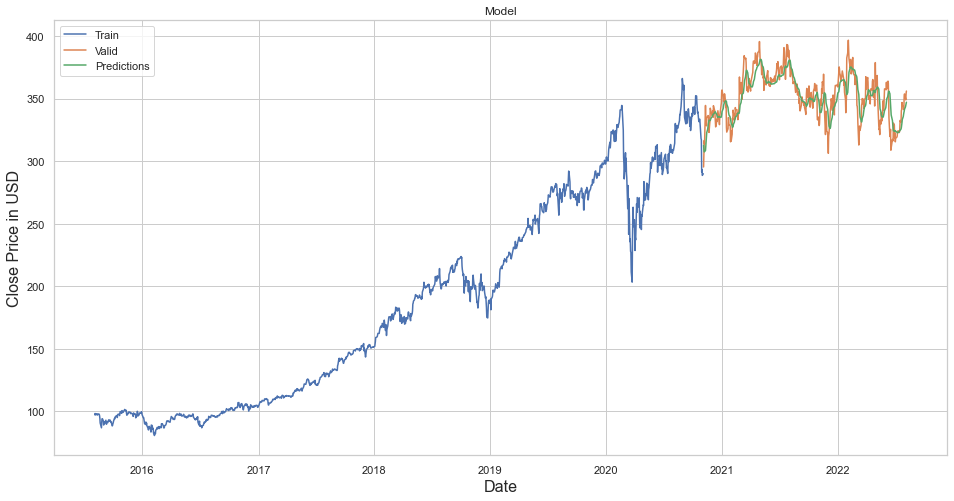

In [46]:
# visualization
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize =16)
plt.ylabel('Close Price in USD', fontsize =16)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Valid', 'Predictions'], loc ='upper left')
plt.show()

In [47]:
# showing the valid vs prediction
valid

,Close,Prediction
Date,,
2020-11-03,295.390015,312.694244
2020-11-04,307.200012,309.092621
2020-11-05,316.529999,307.405212
2020-11-06,313.640015,307.628967
2020-11-09,344.559998,308.552795
...,...,...
2022-07-29,353.790009,341.562134
2022-08-01,350.540009,343.393158
2022-08-02,349.010010,344.883392


#### predicting next day price using the past 70days

In [48]:
mc_last_70_days = mc.tail(70).values

In [49]:
mc_last_70_days

array([[344.109985],
       [361.570007],
       [378.829987],
       [363.380005],
       [359.040009],
       [357.790009],
       [368.519989],
       [353.369995],
       [347.119995],
       [327.98999 ],
       [325.329987],
       [325.869995],
       [321.23999 ],
       [332.799988],
       [329.730011],
       [338.859985],
       [335.899994],
       [332.220001],
       [336.179993],
       [348.429993],
       [340.690002],
       [344.76001 ],
       [349.890015],
       [357.779999],
       [357.869995],
       [357.059998],
       [363.079987],
       [357.820007],
       [360.140015],
       [364.019989],
       [362.329987],
       [349.      ],
       [334.75    ],
       [319.73999 ],
       [322.140015],
       [325.390015],
       [308.779999],
       [310.690002],
       [317.399994],
       [316.149994],
       [316.76001 ],
       [330.5     ],
       [328.829987],
       [318.290009],
       [322.589996],
       [315.480011],
       [318.23999 ],
       [319.2

In [50]:
mc_last_70_days_scaled = scaler.transform(mc_last_70_days)

In [51]:
mc_last_70_days_scaled

array([[0.83347037],
       [0.88870613],
       [0.94330904],
       [0.89443216],
       [0.88070234],
       [0.87674789],
       [0.91069278],
       [0.86276493],
       [0.84299271],
       [0.78247387],
       [0.7740588 ],
       [0.77576715],
       [0.76111987],
       [0.79769056],
       [0.78797852],
       [0.8168617 ],
       [0.80749761],
       [0.79585574],
       [0.8083834 ],
       [0.84713696],
       [0.82265106],
       [0.83552676],
       [0.85175582],
       [0.87671623],
       [0.87700093],
       [0.87443846],
       [0.89348303],
       [0.87684279],
       [0.88418227],
       [0.89645678],
       [0.89111037],
       [0.84894021],
       [0.80385954],
       [0.75637453],
       [0.76396714],
       [0.7742487 ],
       [0.72170199],
       [0.72774439],
       [0.74897182],
       [0.74501738],
       [0.7469472 ],
       [0.79041442],
       [0.78513125],
       [0.75178744],
       [0.76539069],
       [0.74289785],
       [0.7516292 ],
       [0.754

In [52]:
X_test =[]
X_test.append(mc_last_70_days_scaled)
X_test =np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[348.44138]], dtype=float32)

In [53]:
print('predicted price 350.7  August 05 2022 actual price 350.40  August 05 2022 source:yahoo finance')

predicted price 350.7  August 05 2022 actual price 350.40  August 05 2022 source:yahoo finance


## Paypal

In [54]:
pp = pypl.filter(['Close'])

In [55]:
pp_close = pp.values
len_of_train_data = math.ceil(len(pp_close)* 0.75)
print(len_of_train_data)

1323


In [56]:
pp_close_scaled =scaler.fit_transform(np.array(pp_close).reshape(-1,1))
pp_close_scaled

array([[0.02993883],
       [0.03109032],
       [0.02957898],
       ...,
       [0.21230658],
       [0.24213746],
       [0.23875496]])

In [57]:

# creating the training data set
#creating the scaled train data set
pp_train_data = pp_close_scaled[0:len_of_train_data, :]
# split the data into x_train and y_train

p_x_train = []
p_y_train = []

for i in range(50, len(pp_train_data)):
    p_x_train.append(pp_train_data[i-50:i,0])
    p_y_train.append(pp_train_data[i,0])


# converting and reshaping our data into np arrays

p_x_train, p_y_train = np.array(p_x_train), np.array(p_y_train)
p_x_train =np.reshape(p_x_train, (p_x_train.shape[0], p_x_train.shape[1],1))
p_x_train.shape

(1273, 50, 1)

In [58]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(p_x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train, y_train, batch_size=1, epochs=1)

1273/1273 [==============================] - 44s 31ms/step - loss: 0.0020


In [59]:
# creating the testing data set
#creating the
p_test_data = pp_close_scaled[len_of_train_data -50:, :]
p_x_test =[]
p_y_test = pp_close[len_of_train_data:,:]
for i in range(50, len(p_test_data)):
    p_x_test.append(p_test_data[i-50:i, 0])

print(p_x_test)
print(p_y_test)

[array([0.60543363, 0.61547319, 0.62198632, 0.62508095, 0.62558473,
       0.62436128, 0.64159768, 0.64839873, 0.62741996, 0.58010074,
       0.55890607, 0.59003241, 0.57380352, 0.55188917, 0.56254051,
       0.55915799, 0.54077008, 0.52234615, 0.52335375, 0.54904645,
       0.56549118, 0.54328896, 0.54537605, 0.56358403, 0.58074849,
       0.58967255, 0.59877654, 0.59845269, 0.58035266, 0.59812885,
       0.57945306, 0.59006838, 0.58449082, 0.59964018, 0.61489743,
       0.6373156 , 0.62241816, 0.62076286, 0.62547678, 0.60967974,
       0.61651676, 0.65649517, 0.62360559, 0.620403  , 0.59946024,
       0.61101113, 0.58179201, 0.59161567, 0.55955382, 0.5654192 ]), array([0.61547319, 0.62198632, 0.62508095, 0.62558473, 0.62436128,
       0.64159768, 0.64839873, 0.62741996, 0.58010074, 0.55890607,
       0.59003241, 0.57380352, 0.55188917, 0.56254051, 0.55915799,
       0.54077008, 0.52234615, 0.52335375, 0.54904645, 0.56549118,
       0.54328896, 0.54537605, 0.56358403, 0.58074849, 0.58

In [60]:

p_x_test =np.array(p_x_test)
p_x_test = np.reshape(p_x_test, (p_x_test.shape[0], p_x_test.shape[1], 1))


# Getting the nmodel prediction price
p_pred = model.predict(p_x_test)
p_pred = scaler.inverse_transform(p_pred)

# Getting the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(p_pred -p_y_test)**2)
rmse

22.79012353496581

C:\Users\Emack\AppData\Local\Temp\ipykernel_8048\2581074503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_valid['Prediction'] = p_pred


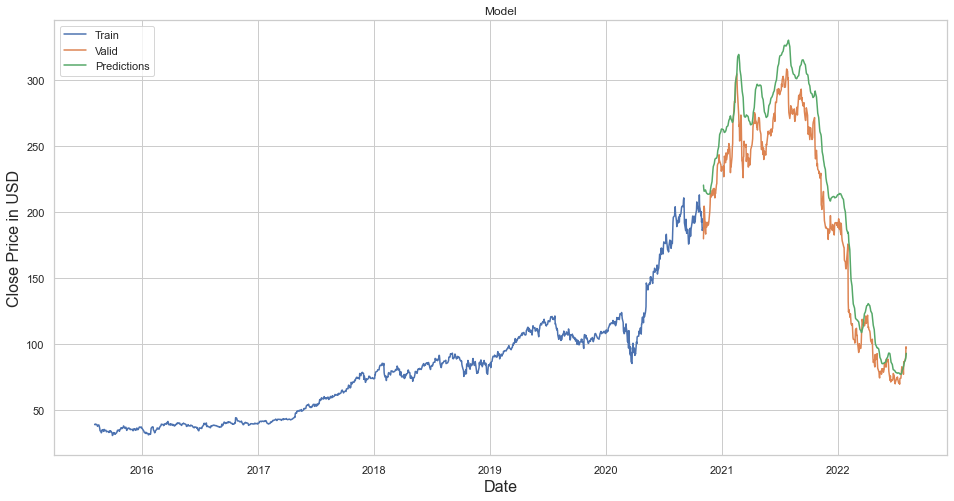

In [61]:

# plotting the data

p_train = pp[:len_of_train_data]
p_valid = pp[len_of_train_data:]
p_valid['Prediction'] = p_pred


# visualization
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize =16)
plt.ylabel('Close Price in USD', fontsize =16)
plt.plot(p_train['Close'])
plt.plot(p_valid[['Close', 'Prediction']])
plt.legend(['Train', 'Valid', 'Predictions'], loc ='upper left')
plt.show()



In [62]:
# showing the valid vs prediction
p_valid

,Close,Prediction
Date,,
2020-11-03,179.809998,220.482483
2020-11-04,194.289993,217.543915
2020-11-05,204.559998,215.853592
2020-11-06,202.729996,215.927429
2020-11-09,184.720001,216.853775
...,...,...
2022-07-29,86.529999,86.387016
2022-08-01,88.565002,87.787170
2022-08-02,89.629997,89.277908


#### predicting next day price using the past 70days

In [63]:
pp_last_70_days = pp.tail(70).values

pp_last_70_days

pp_last_70_days_scaled = scaler.transform(pp_last_70_days)

pp_last_70_days_scaled

p_X_test =[]
p_X_test.append(pp_last_70_days_scaled)
p_X_test =np.array(p_X_test)
p_X_test = np.reshape(p_X_test, (p_X_test.shape[0], p_X_test.shape[1], 1))
p_pred_price = model.predict(p_X_test)
p_pred_price = scaler.inverse_transform(p_pred_price)
p_pred_price



array([[95.25803]], dtype=float32)

In [64]:
print('predicted price 88.4 August 05 2022, actual price 95.24 August 05 2022 yahoo finance')

predicted price 88.4 August 05 2022, actual price 95.24 August 05 2022 yahoo finance


## VISA

In [65]:








# showing the valid vs prediction

valid



,Close,Prediction
Date,,
2020-11-03,295.390015,312.694244
2020-11-04,307.200012,309.092621
2020-11-05,316.529999,307.405212
2020-11-06,313.640015,307.628967
2020-11-09,344.559998,308.552795
...,...,...
2022-07-29,353.790009,341.562134
2022-08-01,350.540009,343.393158
2022-08-02,349.010010,344.883392


In [66]:
vs = visa.filter(['Close'])

In [67]:
vs_close = vs.values
len_of_train_data = math.ceil(len(vs_close)* 0.75)

vs_close_scaled =scaler.fit_transform(np.array(vs_close).reshape(-1,1))
vs_close_scaled



array([[0.04511848],
       [0.04354209],
       [0.03593173],
       ...,
       [0.75717547],
       [0.76924332],
       [0.79636881]])

In [68]:
# creating the training data set
#creating the scaled train data set
vs_train_data = vs_close_scaled[0:len_of_train_data, :]
# split the data into x_train and y_train

In [69]:
vs_x_train = []
vs_y_train = []

for i in range(50, len(vs_train_data)):
    vs_x_train.append(vs_train_data[i-50:i,0])
    vs_y_train.append(vs_train_data[i,0])


# converting and reshaping our data into np arrays

vs_x_train, vs_y_train = np.array(vs_x_train), np.array(vs_y_train)
vs_x_train =np.reshape(vs_x_train, (vs_x_train.shape[0], vs_x_train.shape[1],1))
vs_x_train.shape

(1273, 50, 1)

In [70]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(vs_x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [71]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1273/1273 [==============================] - 43s 30ms/step - loss: 0.0017


In [72]:

vs_test_data = vs_close_scaled[len_of_train_data -50:, :]
vs_x_test =[]
vs_y_test = vs_close[len_of_train_data:,:]
for i in range(50, len(vs_test_data)):
    vs_x_test.append(vs_test_data[i-50:i, 0])


vs_x_test =np.array(vs_x_test)
vs_x_test = np.reshape(vs_x_test, (vs_x_test.shape[0], vs_x_test.shape[1], 1))


# Getting the nmodel prediction price
vs_pred = model.predict(vs_x_test)
vs_pred = scaler.inverse_transform(vs_pred)

# Getting the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(vs_pred -vs_y_test)**2)
rmse

2.9621345119955533

C:\Users\Emack\AppData\Local\Temp\ipykernel_8048\3101604629.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vs_valid['Prediction'] = vs_pred


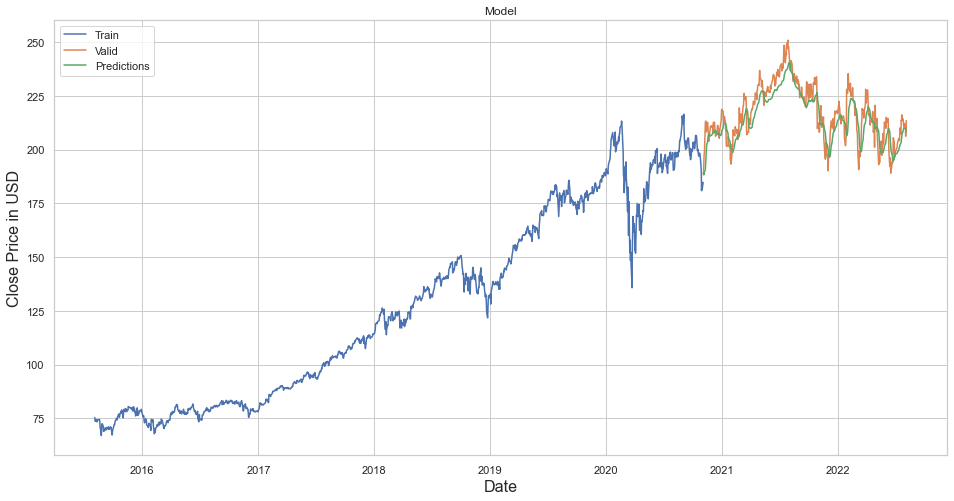

In [73]:
# plotting the data

vs_train = vs[:len_of_train_data]
vs_valid = vs[len_of_train_data:]
vs_valid['Prediction'] = vs_pred


# visualization
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize =16)
plt.ylabel('Close Price in USD', fontsize =16)
plt.plot(vs_train['Close'])
plt.plot(vs_valid[['Close', 'Prediction']])
plt.legend(['Train', 'Valid', 'Predictions'], loc ='upper left')
plt.show()

In [74]:

vs_last_70_days = vs.tail(70).values

vs_last_70_days_scaled = scaler.transform(vs_last_70_days)

vs_last_70_days_scaled




array([[0.72912596],
       [0.79984783],
       [0.83545341],
       [0.7945206 ],
       [0.78582303],
       [0.76967821],
       [0.80207659],
       [0.75163084],
       [0.73847582],
       [0.68509461],
       [0.68824748],
       [0.7053164 ],
       [0.6903675 ],
       [0.71896065],
       [0.71124159],
       [0.74489022],
       [0.72309203],
       [0.70884975],
       [0.71787347],
       [0.76424224],
       [0.73744298],
       [0.74402044],
       [0.76962388],
       [0.79316161],
       [0.78930204],
       [0.77712545],
       [0.80495765],
       [0.79191128],
       [0.79348775],
       [0.80196785],
       [0.79653188],
       [0.75636011],
       [0.72048271],
       [0.68107197],
       [0.68792133],
       [0.70227228],
       [0.66362257],
       [0.66884105],
       [0.6926506 ],
       [0.68955214],
       [0.70488152],
       [0.7530985 ],
       [0.74249839],
       [0.71292672],
       [0.72042838],
       [0.70624051],
       [0.71868883],
       [0.726

In [75]:
vs_valid

,Close,Prediction
Date,,
2020-11-03,188.339996,189.116898
2020-11-04,193.970001,188.324341
2020-11-05,197.639999,188.493683
2020-11-06,198.470001,189.467056
2020-11-09,212.679993,190.822968
...,...,...
2022-07-29,212.110001,209.988754
2022-08-01,211.360001,209.958115
2022-08-02,206.259995,209.863007


#### predicting next day price using the past 70days

In [76]:

vs_X_test =[]
vs_X_test.append(vs_last_70_days_scaled)
vs_X_test =np.array(vs_X_test)
vs_X_test = np.reshape(vs_X_test, (vs_X_test.shape[0], vs_X_test.shape[1], 1))
vs_pred_price = model.predict(vs_X_test)
vs_pred_price = scaler.inverse_transform(vs_pred_price)
vs_pred_price

array([[208.71487]], dtype=float32)

In [77]:
print('predicted price 224.3 August 05 2022, actual price 215.87 August 05 2022 yahoo finance')

predicted price 224.3 August 05 2022, actual price 215.87 August 05 2022 yahoo finance
